<h1>Assignment 2</h1>
<h2>Group 19</h2>

Nicolò Bruna 03755518<br>
Bogac Ünver 03714949<br>
Michael Lemanov 03766090<br> 
Gamze Naz Kiprit 03692541<br> 
Konstantinos Larintzakis 03716459<br> 
Volkan Arsan 03709328<br> 
Ivan Nikolovski 03717921<br> 
Karahan Yilmazer 03717524

**Task 1.a**

Let $\mathbf{X}\in \mathbb{R}^{p\times N}$ with $p < N$ be a centered matrix of $p$ $N$-dimensional data samples with the full-size SVD $\mathbf{X} = \mathbf{U}\mathbf{Σ}\mathbf{V}^{T}$. 
The singular values are sorted in a descending manner, i.e. $σ_{1,1} \geq . . . \geq σ_{p,p}$.

$\mathbf{Σ} = \left[\begin{array}{ccc|c} 
σ_{1,1} & & &  \\ 
& \ddots & & \underline{\mathbf{0}}_{p\times q} \\ 
& & σ_{p,p} &  
\end{array}\right]\in \mathbb{R}^{p\times N}~~$ with $~~q = N - p$.

<br>
<br>
For $\mathbf{s}\in \mathbb{R}^{p}$ we get that:
\begin{align}
\mathbf{s}^{T}\mathbf{Σ}\mathbf{Σ}^{T}\mathbf{s} &= \mathbf{s}^{T}\begin{bmatrix}  σ_{1,1}^{2} & & \\ 
& \ddots &  \\ 
& & σ_{p,p}^{2} 
\end{bmatrix}\mathbf{s} \\ \\ &= σ_{1,1}^{2}s_{1}^{2} + . . . + σ_{p,p}^{2}s_{p}^{2}
\end{align}


As a result we have:

<br>
\begin{align}
\hat{\mathbf{s}} ~&= ~\underset{\mathbf{s}, ~\lVert \mathbf{s}  \rVert =1}{\operatorname{argmax}} \mathbf{s}^{T}\mathbf{Σ}\mathbf{Σ}^{T}\mathbf{s} \\ &= ~\underset{\mathbf{s}, ~\lVert \mathbf{s} \rVert =1 }{\operatorname{argmax}} σ_{1,1}^{2}s_{1}^{2} + . . . + σ_{p,p}^{2}s_{p}^{2}
\end{align}

<br>
<br>
Since:

<br>
\begin{align}
σ_{1,1}^{2}s_{1}^{2} + . . . + σ_{p,p}^{2}s_{p}^{2} &\leq σ_{1,1}^{2}s_{1}^{2} + . . . + σ_{1,1}^{2}s_{p}^{2} \\
&\leq σ_{1,1}^{2}(s_{1}^{2} + . . . + s_{p}^{2}) \\
&\leq σ_{1,1}^{2}\lVert \mathbf{s} \rVert^{2} \\
&= σ_{1,1}^{2}
\end{align}

<br>
<br>
Thus:
<div style="text-align: center"> $\hat{\mathbf{s}} = \pm \begin{bmatrix} 1 & 0 & \dots & 0 \end{bmatrix}^{T}$.</div>

**Task 1.b**

The empirical variance of the inner products of the columns of X with a normalized vector $\mathbf{a}\in \mathbb{R}^{p}$, with $\lVert \mathbf{a}  \rVert = 1$ is defined as:

\begin{equation}
\frac{1}{N}\sum_{i=1}^{N}(\mathbf{a}^{T}\mathbf{x_{i}})^{2} = \frac{1}{N}\mathbf{a}^{T}\mathbf{X}\mathbf{X}^{T}\mathbf{a} .
\end{equation}

We define $\mathbf{a} = \mathbf{U}\mathbf{b}$ with a $\mathbf{b}\in \mathbb{R}^{p}$ and $\lVert \mathbf{b}  \rVert = 1$. That way we ensure that the norm of the vector a is equal to 1 since:

\begin{align}
\lVert \mathbf{a}  \rVert &= \lVert \mathbf{Ub}  \rVert \\ 
&= \sqrt{\mathbf{b}^{T}\mathbf{U}^{T}\mathbf{U}\mathbf{b}} \\
&= \sqrt{\mathbf{b}^{T}\mathbf{b}} \\ 
&= \lVert \mathbf{b}  \rVert \\ 
&= 1. 
\end{align}

We have:

\begin{align}
\hat{\mathbf{b}} &= \underset{\mathbf{b}, ~\lVert \mathbf{b}  \rVert =1}{\operatorname{argmax}} \frac{1}{N}\mathbf{b}^{T}\mathbf{U}^{T}\mathbf{X}\mathbf{X}^{T}\mathbf{U}\mathbf{b} \\
&= \underset{\mathbf{b}, ~\lVert \mathbf{b}  \rVert =1}{\operatorname{argmax}} \mathbf{b}^{T}\mathbf{U}^{T}\mathbf{U}\mathbf{Σ}\mathbf{V}^{T}\mathbf{V}\mathbf{Σ}^{T}\mathbf{U}^{T}\mathbf{U}\mathbf{b} \\
&= \underset{\mathbf{b}, ~\lVert \mathbf{b}  \rVert =1}{\operatorname{argmax}} \mathbf{b}^{T}\mathbf{Σ}\mathbf{Σ}^{T}\mathbf{b}
\end{align}

From **Task 1.a** we know that $\hat{\mathbf{b}} = \begin{bmatrix} 1 & 0 & \dots & 0 \end{bmatrix}^{T}$ and thus we get that $\mathbf{a} = \mathbf{u}_{1}$.

In [1]:
import imageio.v2 as imageio
import numpy as np
from os import listdir
import matplotlib.pyplot as plt

In [2]:
data_folder = "./yaleBfaces"
test_subset_names = ["subset1", "subset2", "subset3", "subset4"]
training_data_folder = "./yaleBfaces/subset0"
training_img_names = listdir(training_data_folder)

In [3]:
# calculate first 20 singular vectors
def get_singular_vectors(T):
    u, s, vh = np.linalg.svd(T, full_matrices=False);
    return u[:, 0:20]

In [4]:
# extract training labels from file names
training_labels = [file[6:8] for file in training_img_names]

In [5]:
# center and normalize
def normalize_matrix(M):
    M = np.array(M)
    norms = np.linalg.norm(M, axis=1)
    M = M / norms[:, np.newaxis]
    M -= np.expand_dims(np.sum(M, axis=1)/M.shape[1], axis=1)
    return M

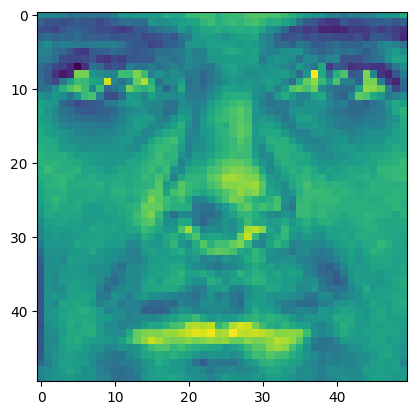

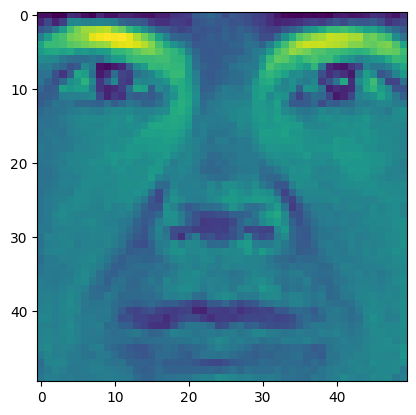

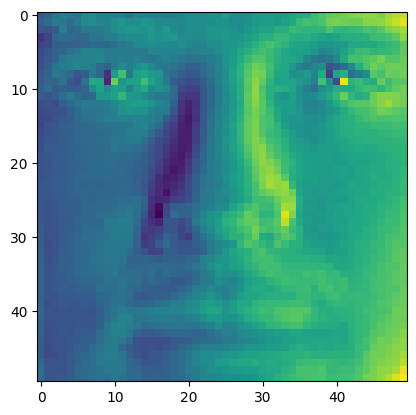

In [6]:
# vectorize training images and store them in a matrix
vectorized_training_images = np.empty((50*50, len(training_img_names)))
for i, img_name in enumerate(training_img_names):
    img_path = training_data_folder + "/" + img_name
    training_image = np.array(imageio.imread(img_path)).astype(np.float64)
    vec_training_image = training_image.flatten()
    vectorized_training_images[:, i] = vec_training_image
    
vectorized_training_images = normalize_matrix(vectorized_training_images)
    
# vectorize test images and store them in a matrix, extract test labels from file names
test_labels_subsets = []
vectorized_test_images_subsets = []
for test_subset in test_subset_names:
    folder_path = data_folder + "/" + test_subset
    test_img_names = listdir(folder_path)
    test_labels = np.array([file[6:8] for file in test_img_names])
    
    vectorized_test_images = np.empty((50*50, len(test_img_names)))
    test_labels_subsets.append(test_labels)
    for i, img_name in enumerate(test_img_names):
        img_path = folder_path + "/" + img_name
        test_image = np.array(imageio.imread(img_path)).astype(np.float64)
        vec_test_image = test_image.flatten()
        vectorized_test_images[:, i] = vec_test_image
    vectorized_test_images = normalize_matrix(vectorized_test_images)
    vectorized_test_images_subsets.append(vectorized_test_images)

# calculate singular vectors
singular_vectors = get_singular_vectors(vectorized_training_images)

# display first 3 singular vectors as images
for i in range(3):
  singular_vec = singular_vectors[:, i]
  image = singular_vec.reshape(50, 50)
  plt.imshow(image)
  plt.show()



In [7]:
# knn classification based on 3 neares neighbors, calcula misclassification rate
def classify_samples(T, T_labels, S, S_labels, singular_vectors, k):
    T_reduced = np.transpose(singular_vectors[:, :k]) @ T
    S_reduced = np.transpose(singular_vectors[:, :k]) @ S
    num_misclassified = 0

    num_test_samples = S_reduced.shape[1]
    num_training_samples = T_reduced.shape[1]
    
    for i in range(num_test_samples):
        s = S_reduced[:,i]
        distances = []
        for j in range(num_training_samples):
            dist = np.linalg.norm(T_reduced[:,j] - s)
            distances.append(dist)
        k_nearest = np.argpartition(distances, 3)[:3]
        a, b = np.unique(np.take(T_labels, k_nearest), return_counts=True)
        max_index = b.argmax()
        most_common_label = a[max_index]
        if most_common_label != S_labels[i]:
            num_misclassified += 1

    return num_misclassified / len(S_labels)

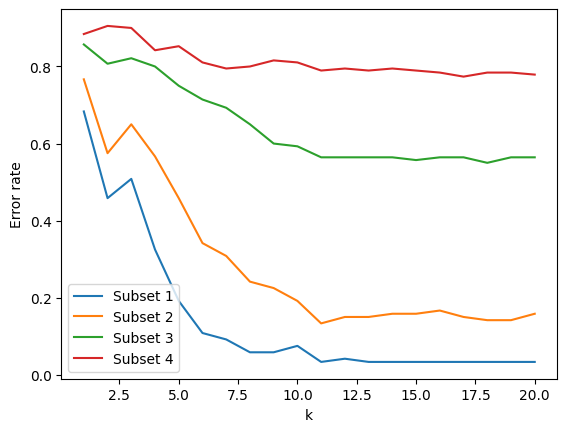

In [8]:
# classify for k = 1 to 20
for i, (images, labels) in enumerate(zip(vectorized_test_images_subsets, test_labels_subsets)):
    error_rates_all_sv = []
    for k in range (1, 21):
        error_rate = classify_samples(vectorized_training_images, 
                                      training_labels, images, 
                                      labels, singular_vectors, k)
        error_rates_all_sv.append(error_rate)
    plt.plot(range(1,21), error_rates_all_sv, label="Subset " + str(i+1))
plt.xlabel('k')
plt.ylabel('Error rate')
plt.legend()
plt.show()

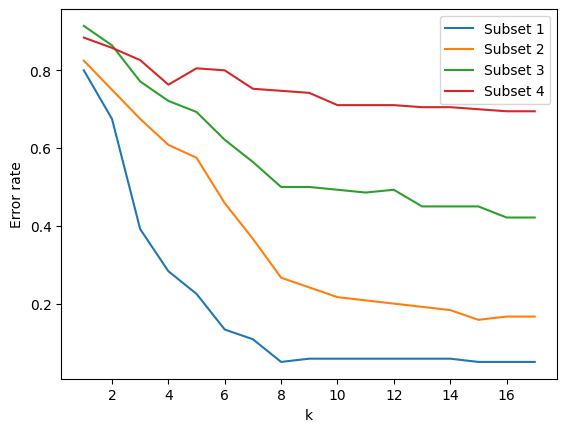

In [9]:
# classify for k = 1 to 17, excluding first 3 singular vectors
for i, (images, labels) in enumerate(zip(vectorized_test_images_subsets, test_labels_subsets)):
    error_rates_3_sv = []
    for k in range (1, 18):
        error_rate = classify_samples(vectorized_training_images, 
                                      training_labels, images, 
                                      labels, singular_vectors[:,3:], k)
        error_rates_3_sv.append(error_rate)
    plt.plot(range (1, 18), error_rates_3_sv, label="Subset " + str(i+1))
plt.xlabel('k')
plt.ylabel('Error rate')
plt.legend()
plt.show()

<p>Principal components of training set do not contain enough information to seperate classes in subset 4. This may be due to the lighting conditions in subset 4, which are not present in training set. So removing first 3 principal components may have decreased error rate, because they do not hold relevant information about subset 4.
<br>
<p>Same situation applies to subset 3. Even though first 3 principal components contain more variance of training set, they may not be as good as the other 17 principal components to seperate classes in subset 3.
<br>
<p>For subsets 1 and 2 removing first 3 principal components did not cause significant improvement. Last 17 principal components are as good as all 20 principal components for classification.